# Holt's linear trend method
fpp2 패키지의 Air Transport Passengers Australia 데이터를 가지고 **홀트의 선형지수평활법**을 실습해봅니다.
홀트선형지수평활법은 추세가 있는 데이터를 예측할 수 있도록 단순 지수 평활을 확장한 모형이며, 두개의 평활식(수준에 관한 것, 추세에 관한 것)으로 이루어집니다.수준식은 관측값의 가중 평균이며, 추정된 추세의 이동 평균입니다.예측 함수는 더이상 평평하지 않고, 추세를 가집니다.

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


A Time Series:
 [1]  7.31870  7.32660  7.79560  9.38460 10.66470 11.05510 10.86430 11.30650
 [9] 12.12230 13.02250 13.64880 13.21950 13.18790 12.60150 13.23680 14.41210
[17] 15.49730 16.88020 18.81630 15.11430 17.55340 21.86010 23.88660 26.92930
[25] 26.88850 28.83140 30.07510 30.95350 30.18570 31.57970 32.57757 33.47740
[33] 39.02158 41.38643 41.59655 44.65732 46.95177 48.72884 51.48843 50.02697
[41] 60.64091 63.36031 66.35527 68.19795 68.12324 69.77935 72.59770

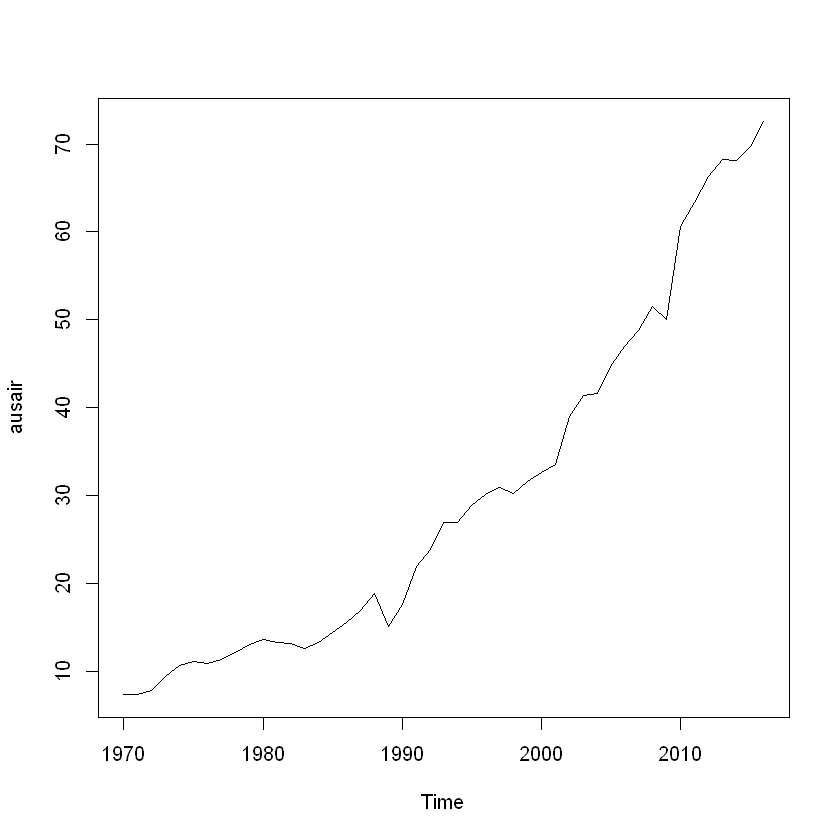

In [1]:
library(fpp2)
ausair
plot(ausair)

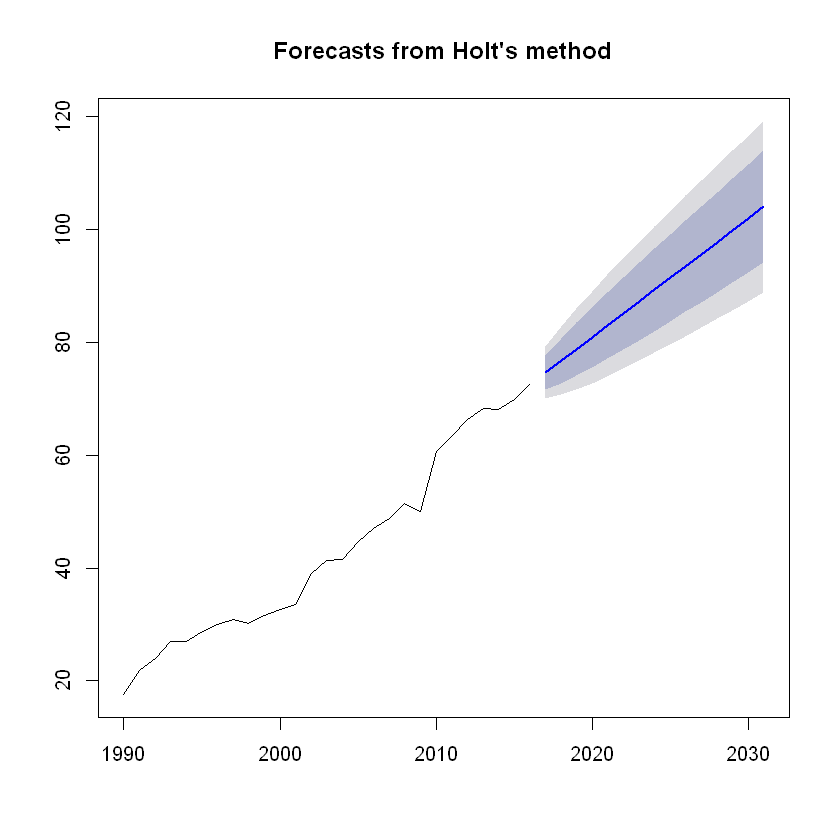

In [2]:
# 1990년 부터 데이터 분석
air.ts <- window(ausair, start=1990)
# h는 미래 1~15시점까지 예측
air_holt <- holt(air.ts, h=15)

plot(air_holt)

In [3]:
# 적합된 모형의 변수 확인
names(air_holt)

# 모형의 통게량(추정량 확인)
air_holt$model
air_holt$model$states

# 적합된 값
air_holt$fitted


[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

Holt's method 

Call:
 holt(y = air.ts, h = 15) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

,l,b
1989,15.57152,2.101717
1990,17.57375,2.101705
1991,21.48918,2.101924
1992,23.83643,2.101953
1993,26.76106,2.102052
1994,27.22376,2.101855
1995,28.91531,2.101805
1996,30.23504,2.101711
1997,31.18835,2.101573
1998,30.71275,2.101262


A Time Series:
 [1] 17.67324 19.67545 23.59111 25.93838 28.86311 29.32561 31.01711 32.33675
 [9] 33.28993 32.81401 33.89040 34.90147 35.82005 40.57920 43.35064 43.99546
[17] 46.64611 49.00107 50.87622 53.48571 52.71508 61.39691 65.12882 68.24903
[25] 70.30861 70.59604 72.01969

In [4]:
summary(air_holt)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = air.ts, h = 15) 

  Smoothing parameters:
    alpha = 0.8302 
    beta  = 1e-04 

  Initial states:
    l = 15.5715 
    b = 2.1017 

  sigma:  2.3645

     AIC     AICc      BIC 
141.1291 143.9863 147.6083 

Error measures:
                      ME     RMSE     MAE        MPE     MAPE      MASE
Training set 0.008359331 2.182343 1.52892 -0.3244107 3.820787 0.6654839
                    ACF1
Training set -0.01335362

Forecasts:
     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.60130 71.57106  77.63154 69.96695  79.23566
2018       76.70304 72.76440  80.64169 70.67941  82.72668
2019       78.80478 74.13092  83.47864 71.65673  85.95284
2020       80.90652 75.59817  86.21487 72.78810  89.02494
2021       83.00826 77.13343  88.88310 74.02348  91.99305
2022       85.11000 78.71857  91.50143 75.33516  94.88485
2023       87.21174 80.34235  94.08113 76.70591  97.71757
2024       89.31348 8

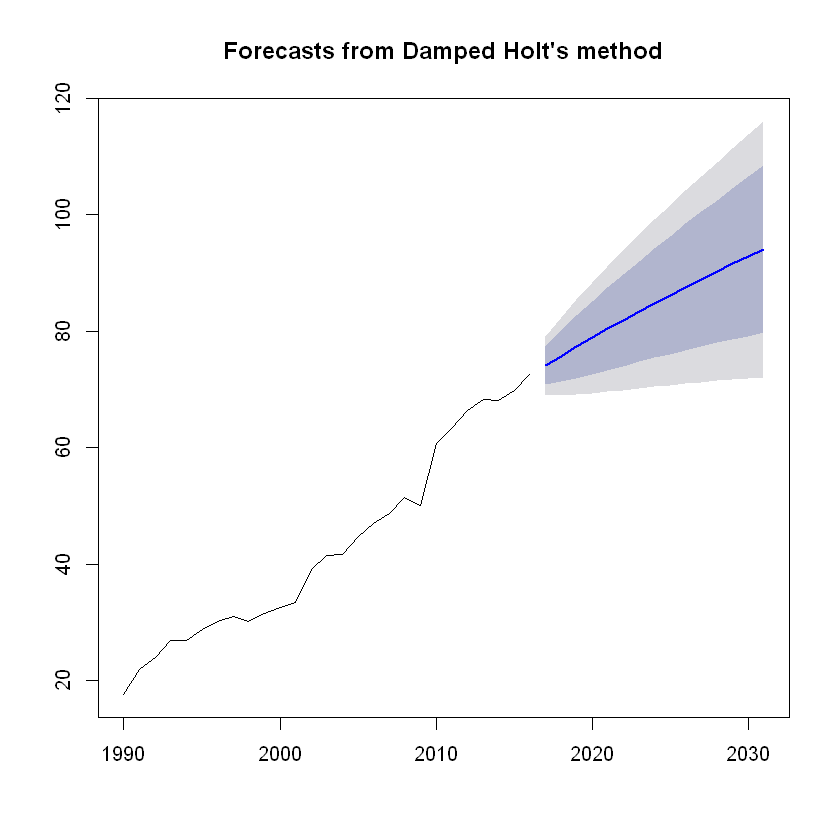

In [5]:
air_holt_de <- holt(air.ts, damped=TRUE, h=15)
plot(air_holt_de)

In [6]:
# 적합된 모형의 변수 확인
names(air_holt_de)

# 모형의 통게량(추정량 확인)
air_holt_de$model
air_holt_de$model$states

# 적합된 값
air_holt_de$fitted


[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

Damped Holt's method 

Call:
 holt(y = air.ts, h = 15, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.8691 
    beta  = 0.0409 
    phi   = 0.98 

  Initial states:
    l = 15.373 
    b = 2.2224 

  sigma:  2.532

     AIC     AICc      BIC 
145.6239 149.8239 153.3989 

,l,b
1989,15.37296,2.222414
1990,17.55308,2.178067
1991,21.57562,2.223377
1992,23.86931,2.184312
1993,26.80891,2.178235
1994,27.15760,2.050602
1995,28.87537,1.995854
1996,30.17412,1.925003
1997,31.09847,1.841213
1998,30.54150,1.693237


A Time Series:
 [1] 17.55093 19.68758 23.75453 26.00993 28.94358 29.16719 30.83131 32.06062
 [9] 32.90286 32.20087 33.26232 34.20904 35.05484 40.11318 42.84956 43.30765
[17] 46.05078 48.40870 50.24316 52.90040 51.83158 61.24030 64.88557 67.98855
[25] 69.96814 70.05252 71.45811

In [7]:
summary(air_holt_de)


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = air.ts, h = 15, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.8691 
    beta  = 0.0409 
    phi   = 0.98 

  Initial states:
    l = 15.373 
    b = 2.2224 

  sigma:  2.532

     AIC     AICc      BIC 
145.6239 149.8239 153.3989 

Error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.3991511 2.285529 1.529037 0.560457 3.672339 0.6655348
                    ACF1
Training set -0.03143013

Forecasts:
     Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
2017       74.10429 70.85945  77.34913 69.14174  79.06685
2018       75.72699 71.34160  80.11238 69.02012  82.43386
2019       77.31724 71.95975  82.67472 69.12367  85.51081
2020       78.87568 72.63402  85.11733 69.32989  88.42147
2021       80.40295 73.33096  87.47494 69.58727  91.21862
2022       81.89967 74.03329  89.76606 69.86907  93.93028
2023       83.36647 74.73101  92.00192 